<a href="https://colab.research.google.com/github/Vatsal-Patel-09/Machine_Learning_101/blob/main/Lab_5_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 5 Supervised Learning– Regression

In [364]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

In [365]:
# dataset
housing = fetch_california_housing(as_frame=True)
df = housing.frame

In [366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [367]:
# print(df.head(5))

 ### Exercises
 #### Apply the following regression models to predict charges:


 - Simple Linear Regression (using MedInc only)
 - Multiple Linear Regression (all features)
 - Polynomial Regression (degree 2 and 3, using both single and multiple
 features)
 - Ridge Regression (with tuning alpha)
 - Lasso Regression (with tuning alpha)
 - Decision Tree Regressor

#### For each model:
 - Train the model
 - Predict on test data
 - Evaluate and record:
    - MAE
    - MSE
    - RMSE
    - R² Score
 - Create scatter plot of actual vs predicted value

In [368]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [369]:
# features and target
X = df.drop('MedHouseVal', axis =1)
y = df['MedHouseVal']

In [370]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [371]:
# evaluate functions
def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f'MAE: {mae:.2f}')
    print(f'MSE: {mse:.2f}')
    print(f'RMSE: {rmse:.2f}')
    print(f'R2 Score: {r2:.2f}')

In [372]:
# visualise funtion
def visualize(y_test, y_pred):
    plt.scatter(y_test[y_pred > y_test], y_pred[y_pred > y_test], color='red', label='Predicted > Actual')
    plt.scatter(y_test[y_pred < y_test], y_pred[y_pred < y_test], color='blue', label='Predicted < Actual')

    # Add a line representing the linear regression fit
    m, b = np.polyfit(y_test, y_pred, 1)
    plt.plot(y_test, m*y_test + b, color='green', label='Linear Fit')

    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs Predicted')
    plt.legend()
    plt.show()

#### Simple Linear Regression (using MedInc only)

In [373]:
# train model - simple liner regression
X_train_inc = X_train[['MedInc']]
X_test_inc = X_test[['MedInc']]

model = LinearRegression()
model.fit(X_train_inc, y_train)

LinearRegression()

In [374]:
prediction = model.predict(X_test_inc)

Simple Linear Regression:
MAE: 0.63
MSE: 0.70
RMSE: 0.84
R2 Score: 0.49


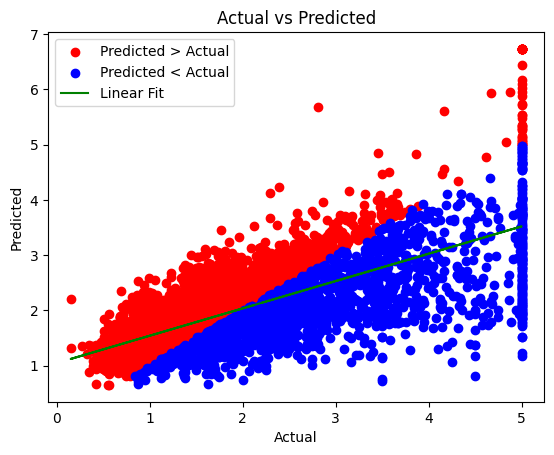

In [375]:
print("Simple Linear Regression:")
evaluate(y_test, prediction)
visualize(y_test, prediction)

#### Multiple Linear Regression (all features)

In [376]:
# train model - multiple liner regression
X_train_mult = X_train
X_test_mult = X_test

model = LinearRegression()
model.fit(X_train_mult, y_train)

LinearRegression()

In [377]:
prediction = model.predict(X_test)

Multiple Linear Regression:
MAE: 0.53
MSE: 0.53
RMSE: 0.73
R2 Score: 0.62


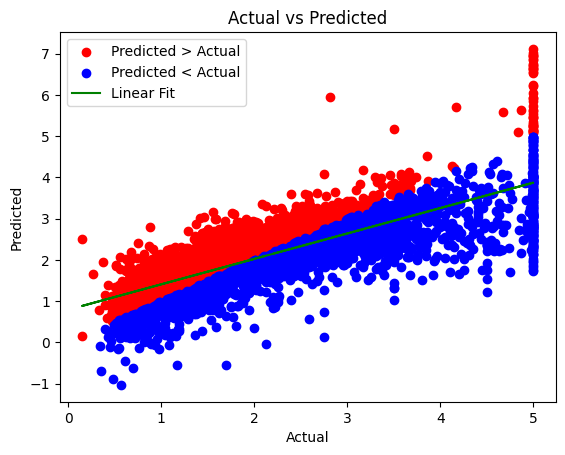

In [378]:
print("Multiple Linear Regression:")
evaluate(y_test, prediction)
visualize(y_test, prediction)

#### Polynomial Regression (degree 2 and 3, using both single and multiple features)

In [379]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [380]:
# degree 2 simple regression
model = make_pipeline(PolynomialFeatures(2), LinearRegression())
model.fit(X_train_inc, y_train)
prediction = model.predict(X_test_inc)
print("Polynomial Regression (degree 2):")
evaluate(y_test, prediction)
# visualize(y_test, prediction)

Polynomial Regression (degree 2):
MAE: 0.62
MSE: 0.69
RMSE: 0.83
R2 Score: 0.49


In [381]:
# degree 2 simple regression
model = make_pipeline(PolynomialFeatures(2), LinearRegression())
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print("Polynomial Regression (degree 2):")
evaluate(y_test, prediction)
# visualize(y_test, prediction)

Polynomial Regression (degree 2):
MAE: 0.46
MSE: 0.44
RMSE: 0.66
R2 Score: 0.68


In [382]:
# degree 3 simple regression
model = make_pipeline(PolynomialFeatures(3), LinearRegression())
model.fit(X_train_inc, y_train)
prediction = model.predict(X_test_inc)
print("Polynomial Regression (degree 3):")
evaluate(y_test, prediction)
# visualize(y_test, prediction)

Polynomial Regression (degree 3):
MAE: 0.62
MSE: 0.69
RMSE: 0.83
R2 Score: 0.50


In [383]:
# degree 3 multi regression
model = make_pipeline(PolynomialFeatures(3), LinearRegression())
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print("Polynomial Regression (degree 3):")
evaluate(y_test, prediction)
# visualize(y_test, prediction)

Polynomial Regression (degree 3):
MAE: 0.44
MSE: 0.44
RMSE: 0.66
R2 Score: 0.68


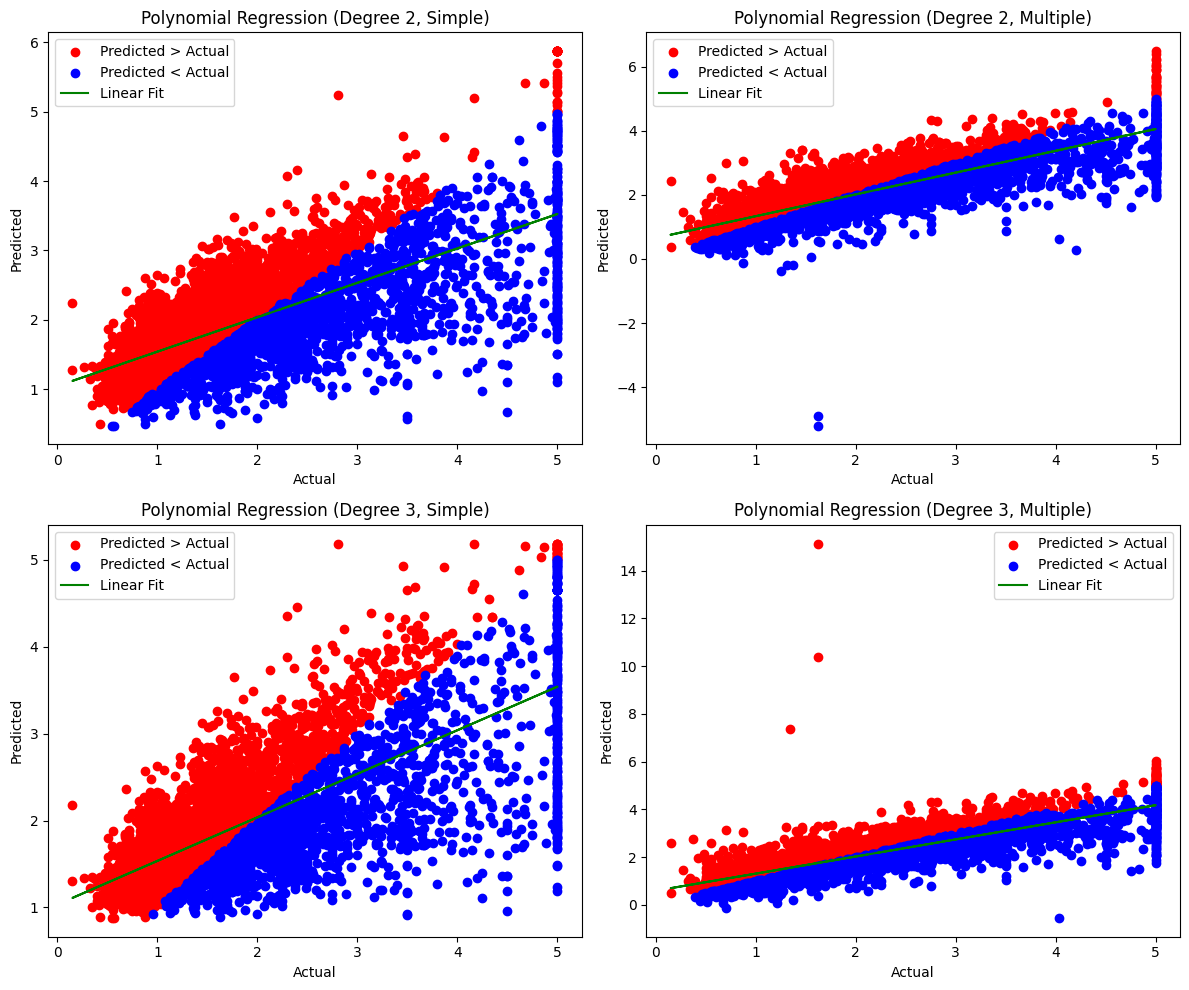

In [384]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Degree 2 Simple Regression
model_deg2_simple = make_pipeline(PolynomialFeatures(2), LinearRegression())
model_deg2_simple.fit(X_train_inc, y_train)
prediction_deg2_simple = model_deg2_simple.predict(X_test_inc)
axes[0, 0].scatter(y_test[prediction_deg2_simple > y_test], prediction_deg2_simple[prediction_deg2_simple > y_test], color='red', label='Predicted > Actual')
axes[0, 0].scatter(y_test[prediction_deg2_simple < y_test], prediction_deg2_simple[prediction_deg2_simple < y_test], color='blue', label='Predicted < Actual')
m, b = np.polyfit(y_test, prediction_deg2_simple, 1)
axes[0, 0].plot(y_test, m*y_test + b, color='green', label='Linear Fit')
axes[0, 0].set_title('Polynomial Regression (Degree 2, Simple)')
axes[0, 0].set_xlabel('Actual')
axes[0, 0].set_ylabel('Predicted')
axes[0, 0].legend()

# Degree 2 Multiple Regression
model_deg2_mult = make_pipeline(PolynomialFeatures(2), LinearRegression())
model_deg2_mult.fit(X_train_mult, y_train)
prediction_deg2_mult = model_deg2_mult.predict(X_test_mult)
axes[0, 1].scatter(y_test[prediction_deg2_mult > y_test], prediction_deg2_mult[prediction_deg2_mult > y_test], color='red', label='Predicted > Actual')
axes[0, 1].scatter(y_test[prediction_deg2_mult < y_test], prediction_deg2_mult[prediction_deg2_mult < y_test], color='blue', label='Predicted < Actual')
m, b = np.polyfit(y_test, prediction_deg2_mult, 1)
axes[0, 1].plot(y_test, m*y_test + b, color='green', label='Linear Fit')
axes[0, 1].set_title('Polynomial Regression (Degree 2, Multiple)')
axes[0, 1].set_xlabel('Actual')
axes[0, 1].set_ylabel('Predicted')
axes[0, 1].legend()

# Degree 3 Simple Regression
model_deg3_simple = make_pipeline(PolynomialFeatures(3), LinearRegression())
model_deg3_simple.fit(X_train_inc, y_train)
prediction_deg3_simple = model_deg3_simple.predict(X_test_inc)
axes[1, 0].scatter(y_test[prediction_deg3_simple > y_test], prediction_deg3_simple[prediction_deg3_simple > y_test], color='red', label='Predicted > Actual')
axes[1, 0].scatter(y_test[prediction_deg3_simple < y_test], prediction_deg3_simple[prediction_deg3_simple < y_test], color='blue', label='Predicted < Actual')
m, b = np.polyfit(y_test, prediction_deg3_simple, 1)
axes[1, 0].plot(y_test, m*y_test + b, color='green', label='Linear Fit')
axes[1, 0].set_title('Polynomial Regression (Degree 3, Simple)')
axes[1, 0].set_xlabel('Actual')
axes[1, 0].set_ylabel('Predicted')
axes[1, 0].legend()

# Degree 3 Multiple Regression
model_deg3_mult = make_pipeline(PolynomialFeatures(3), LinearRegression())
model_deg3_mult.fit(X_train_mult, y_train)
prediction_deg3_mult = model_deg3_mult.predict(X_test_mult)
axes[1, 1].scatter(y_test[prediction_deg3_mult > y_test], prediction_deg3_mult[prediction_deg3_mult > y_test], color='red', label='Predicted > Actual')
axes[1, 1].scatter(y_test[prediction_deg3_mult < y_test], prediction_deg3_mult[prediction_deg3_mult < y_test], color='blue', label='Predicted < Actual')
m, b = np.polyfit(y_test, prediction_deg3_mult, 1)
axes[1, 1].plot(y_test, m*y_test + b, color='green', label='Linear Fit')
axes[1, 1].set_title('Polynomial Regression (Degree 3, Multiple)')
axes[1, 1].set_xlabel('Actual')
axes[1, 1].set_ylabel('Predicted')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

#### Ridge Regression (with tuning alpha)

Ridge Regression:
MAE: 0.53
MSE: 0.53
RMSE: 0.73
R2 Score: 0.62


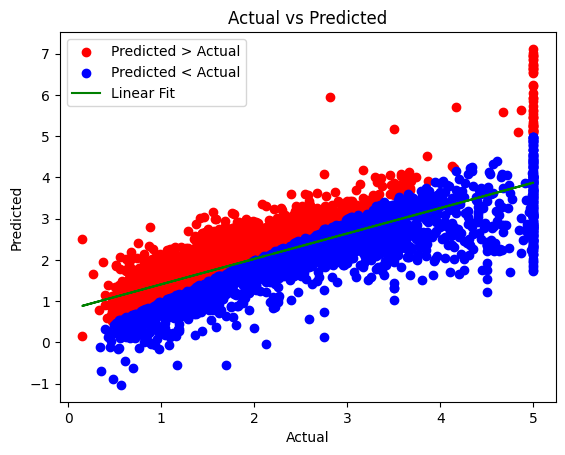

In [385]:
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X_train, y_train)

prediction = model.predict(X_test)

print("Ridge Regression:")
evaluate(y_test, prediction)
visualize(y_test, prediction)


#### Lasso Regression (with tuning alpha)

Lasso Regression:
MAE: 0.78
MSE: 0.98
RMSE: 0.99
R2 Score: 0.29


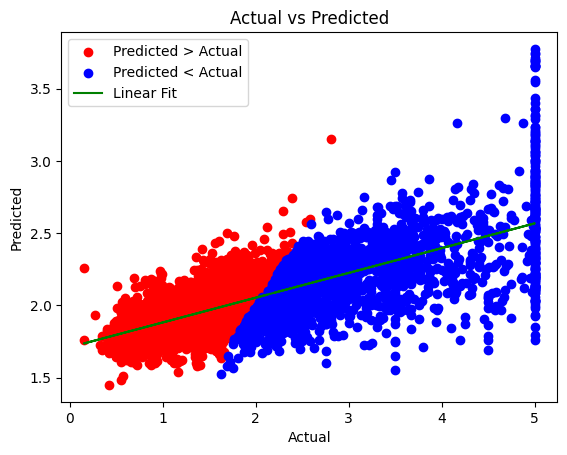

In [386]:
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_train, y_train)

prediction = model.predict(X_test)

print("Lasso Regression:")
evaluate(y_test, prediction)
visualize(y_test, prediction)


#### Decision Tree Regressor

Decision Tree Regressor:
MAE: 0.44
MSE: 0.47
RMSE: 0.68
R2 Score: 0.66


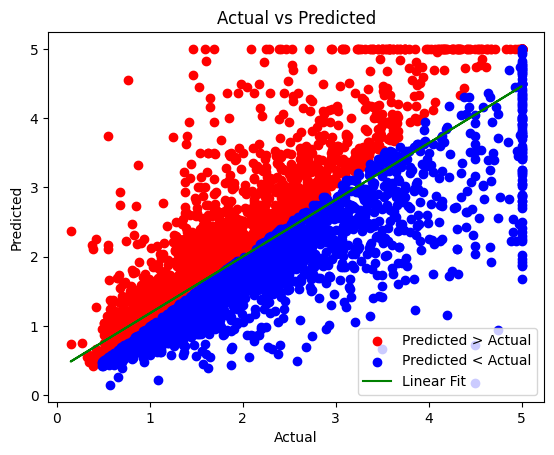

In [387]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

prediction = model.predict(X_test)

print("Decision Tree Regressor:")
evaluate(y_test, prediction)
visualize(y_test, prediction)